In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(10)
y = np.array([12,12,12,1,1,1,3,3,3,3,3])
x_disc = [3, 6]

In [3]:
coeffs = np.fft.fft(y)

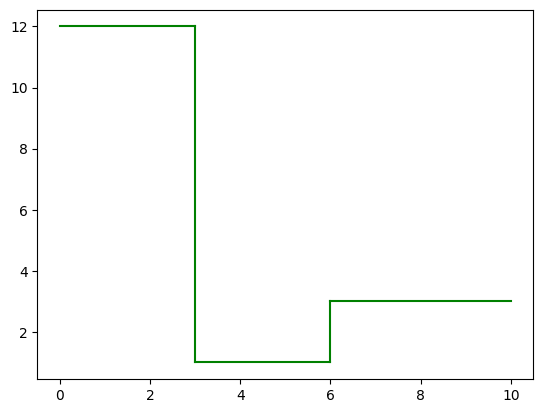

In [4]:
plt.plot(range(4), [12,12,12,12], 'g')
plt.plot(range(3,7), [1,1,1,1], 'g')
plt.plot(range(6,11), [3,3,3,3,3], 'g')
plt.plot((x_disc,x_disc), ([y[0], y[3]], [y[3], y[6]]), 'g')
plt.show()

# Fourier series

\begin{align}
    f(x) = \sum_{n=-N}^{N} c_n \exp{\bigg(\frac{j \cdot 2\pi n x}{L}}\bigg) dx,
\end{align}

We are interested in $c_n$.

And we can calculate it with one of these methods:
1. Discrete Fourier series (DFT)
2. (Continuous) Fourier series (CFT)
3. Improved DFT

## 1. Discrete Fourier series
\begin{equation}
    c_n = \frac{1}{P}\sum_{i=0}^{P-1}f_i \exp{(-j\cdot nx_i)},
\end{equation}

Just put permittivity array into `np.fft.fft` function

In [5]:
dft_coeff = np.fft.fftshift(np.fft.fft(y))
print(dft_coeff)

[ 8.69936615 -4.00205239j  1.23106871 -1.93212957j
 -2.11988593 +5.59928317j  7.36609707+18.61282376j
 23.823354   +8.99784817j 54.         +0.j
 23.823354   -8.99784817j  7.36609707-18.61282376j
 -2.11988593 -5.59928317j  1.23106871 +1.93212957j
  8.69936615 +4.00205239j]


Here, the result array has 11 elements, which is the size of input array.

## 2. Continuous Fourier series (L is normalized to 1)
\begin{align}
    c_n = \int_{0}^{1}f(x)\exp{\big({-j \cdot 2\pi nx}}\big) dx,
\end{align}

Here, $f(x)$ is $\varepsilon$ and we know it is piecewise constant. Then formula becomes

\begin{*align}
    c_n =& \sum_{i=0}^{P-1}\int_{x_i}^{x_{i+1}}\varepsilon_p\cdot \exp{(-j \cdot 2\pi n x)}dx \\
    =& \int_{x_0}^{x_1}\varepsilon_1\cdot \exp{(-j \cdot 2\pi n x)}dx + \int_{x_1}^{x_2}\varepsilon_2\cdot \exp{(-j \cdot 2\pi n x)}dx + \cdots + \int_{x_{P-1}}^{x_P}\varepsilon_P\cdot \exp{(-j \cdot 2\pi n x)}dx,
\end{*align}
which is free from discretization resolution.

## 3. Improved DFT

Now we extended the input array of DFT (from 11 elements to 33 elements) so we have 33 fourier coefficients as an output.

In [6]:
yy = y.repeat(3)
dft_coeff2 = np.fft.fftshift(np.fft.fft(yy))
print(dft_coeff2)

[ 8.20457455e+00-4.76729023e+00j  5.85263525e-01-2.02240950e+00j
  5.29990719e-01+4.62576484e+00j  9.89505006e+00+5.76525631e+00j
  6.93810127e+00-3.75139356e+00j -1.77635684e-15-2.66453526e-15j
  2.45950173e-01+8.80431478e+00j  1.24296074e+01+7.11078232e+00j
  6.01471955e+00-2.61077140e+00j -2.33593223e+00+2.43077627e+00j
 -4.86041353e-02+1.75315421e+01j  1.79421280e+01+1.02926752e+01j
  5.44387482e+00-1.34320293e+00j -1.29043681e+01+9.56131328e+00j
 -2.26366249e-01+5.71839973e+01j  6.42860106e+01+3.95492528e+01j
  1.62000000e+02+0.00000000e+00j  6.42860106e+01-3.95492528e+01j
 -2.26366249e-01-5.71839973e+01j -1.29043681e+01-9.56131328e+00j
  5.44387482e+00+1.34320293e+00j  1.79421280e+01-1.02926752e+01j
 -4.86041353e-02-1.75315421e+01j -2.33593223e+00-2.43077627e+00j
  6.01471955e+00+2.61077140e+00j  1.24296074e+01-7.11078232e+00j
  2.45950173e-01-8.80431478e+00j  0.00000000e+00-8.88178420e-16j
  6.93810127e+00+3.75139356e+00j  9.89505006e+00-5.76525631e+00j
  5.29990719e-01-4.625764

/Users/yongha/miniconda3/envs/rcwa/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


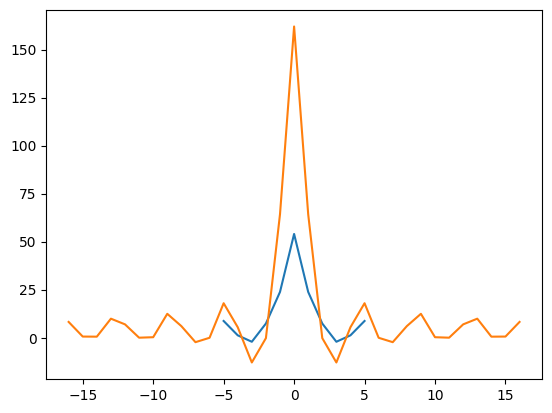

In [7]:
plt.plot(np.arange(-len(dft_coeff)//2+1, len(dft_coeff)//2+1), dft_coeff)
plt.plot(np.arange(-len(dft_coeff2)//2+1, len(dft_coeff2)//2+1), dft_coeff2)
plt.show()

Extended input array (same pattern but with more resolution) makes more Fourier coefficients